<a href="https://colab.research.google.com/github/lluk4z/IF697-CienciaDeDados/blob/main/Projeto02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import io
import requests

%matplotlib inline

In [65]:
url = "https://raw.githubusercontent.com/lluk4z/IF697-CienciaDeDados/main/data.csv"
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [66]:
df = df.dropna(subset = ['stringency_category'])
df

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,log_total_cases,log_total_deaths,log_population_density,log_reproduction_rate,iso_code,continent,location,date,hdi_category,stringency_category,aged_65_older_category,density_category,new_deaths_log,new_cases_log
0,28320.0,3058.0,1735.714,1736.0,204.0,131.000,133.233,14.387,8.166,8.167,0.960,0.616,1.54,74.54,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,4.452093,3.239550,1.398634,0.187521,BRA,South America,Brazil,1586908800000000000,Em Desenvolvimento,Alta_estringencia,População com muitos velhos,Pouco Povoado,2.309630,3.485437
1,33682.0,3257.0,2006.286,2141.0,217.0,154.857,158.459,15.323,9.439,10.072,1.021,0.729,1.52,74.54,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,4.527398,3.330617,1.398634,0.181844,BRA,South America,Brazil,1587081600000000000,Em Desenvolvimento,Alta_estringencia,População com muitos velhos,Pouco Povoado,2.336460,3.512818
2,36658.0,2976.0,2275.857,2354.0,213.0,175.714,172.460,14.001,10.707,11.075,1.002,0.827,1.52,74.54,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,4.564169,3.371806,1.398634,0.181844,BRA,South America,Brazil,1587168000000000000,Em Desenvolvimento,Alta_estringencia,População com muitos velhos,Pouco Povoado,2.328380,3.473633
3,50036.0,4279.0,2801.571,3331.0,425.0,201.000,235.398,20.131,13.180,15.671,1.999,0.946,1.49,74.54,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,4.699283,3.522575,1.398634,0.173186,BRA,South America,Brazil,1587600000000000000,Em Desenvolvimento,Alta_estringencia,População com muitos velhos,Pouco Povoado,2.628389,3.631342
4,54043.0,4007.0,2908.714,3704.0,373.0,223.286,254.249,18.851,13.684,17.426,1.755,1.050,1.50,74.54,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,4.732739,3.568671,1.398634,0.176091,BRA,South America,Brazil,1587686400000000000,Em Desenvolvimento,Alta_estringencia,População com muitos velhos,Pouco Povoado,2.571709,3.602819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,18742025.0,54556.0,50733.000,523587.0,1635.0,1550.286,88173.114,256.662,238.677,2463.250,7.692,7.293,0.88,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,7.272817,5.718989,1.398634,-0.055517,BRA,South America,Brazil,1625270400000000000,Em Desenvolvimento,Media_estringencia,População com muitos velhos,Pouco Povoado,3.213518,4.736843
434,18769808.0,27783.0,49887.143,524417.0,830.0,1563.286,88303.821,130.707,234.697,2467.155,3.905,7.355,0.88,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,7.273460,5.719677,1.398634,-0.055517,BRA,South America,Brazil,1625356800000000000,Em Desenvolvimento,Media_estringencia,População com muitos velhos,Pouco Povoado,2.919078,4.443779
435,18792511.0,22703.0,49158.429,525112.0,695.0,1574.286,88410.629,106.808,231.269,2470.425,3.270,7.406,0.88,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,7.273985,5.720252,1.398634,-0.055517,BRA,South America,Brazil,1625443200000000000,Em Desenvolvimento,Media_estringencia,População com muitos velhos,Pouco Povoado,2.841985,4.356083
436,18855015.0,62504.0,48815.714,526892.0,1780.0,1558.143,88704.683,294.054,229.657,2478.799,8.374,7.330,0.88,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,7.275427,5.721722,1.398634,-0.055517,BRA,South America,Brazil,1625529600000000000,Em Desenvolvimento,Media_estringe

Transforma os dados categoricos em númericos

In [67]:

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["iso_code"] = LE.fit_transform(df["iso_code"])
df["hdi_category"] = LE.fit_transform(df["hdi_category"])
df["continent"] = LE.fit_transform(df["continent"])
df["location"] = LE.fit_transform(df["location"])
df["stringency_category"] = LE.fit_transform(df["stringency_category"])
df["aged_65_older_category"] = LE.fit_transform(df["aged_65_older_category"])
df["density_category"] = LE.fit_transform(df["density_category"])

df

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index,log_total_cases,log_total_deaths,log_population_density,log_reproduction_rate,iso_code,continent,location,date,hdi_category,stringency_category,aged_65_older_category,density_category,new_deaths_log,new_cases_log
0,28320.0,3058.0,1735.714,1736.0,204.0,131.000,133.233,14.387,8.166,8.167,0.960,0.616,1.54,74.54,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,4.452093,3.239550,1.398634,0.187521,0,0,0,1586908800000000000,0,0,0,0,2.309630,3.485437
1,33682.0,3257.0,2006.286,2141.0,217.0,154.857,158.459,15.323,9.439,10.072,1.021,0.729,1.52,74.54,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,4.527398,3.330617,1.398634,0.181844,0,0,0,1587081600000000000,0,0,0,0,2.336460,3.512818
2,36658.0,2976.0,2275.857,2354.0,213.0,175.714,172.460,14.001,10.707,11.075,1.002,0.827,1.52,74.54,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,4.564169,3.371806,1.398634,0.181844,0,0,0,1587168000000000000,0,0,0,0,2.328380,3.473633
3,50036.0,4279.0,2801.571,3331.0,425.0,201.000,235.398,20.131,13.180,15.671,1.999,0.946,1.49,74.54,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,4.699283,3.522575,1.398634,0.173186,0,0,0,1587600000000000000,0,0,0,0,2.628389,3.631342
4,54043.0,4007.0,2908.714,3704.0,373.0,223.286,254.249,18.851,13.684,17.426,1.755,1.050,1.50,74.54,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,4.732739,3.568671,1.398634,0.176091,0,0,0,1587686400000000000,0,0,0,0,2.571709,3.602819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,18742025.0,54556.0,50733.000,523587.0,1635.0,1550.286,88173.114,256.662,238.677,2463.250,7.692,7.293,0.88,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,7.272817,5.718989,1.398634,-0.055517,0,0,0,1625270400000000000,0,2,0,0,3.213518,4.736843
434,18769808.0,27783.0,49887.143,524417.0,830.0,1563.286,88303.821,130.707,234.697,2467.155,3.905,7.355,0.88,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,7.273460,5.719677,1.398634,-0.055517,0,0,0,1625356800000000000,0,2,0,0,2.919078,4.443779
435,18792511.0,22703.0,49158.429,525112.0,695.0,1574.286,88410.629,106.808,231.269,2470.425,3.270,7.406,0.88,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,7.273985,5.720252,1.398634,-0.055517,0,0,0,1625443200000000000,0,2,0,0,2.841985,4.356083
436,18855015.0,62504.0,48815.714,526892.0,1780.0,1558.143,88704.683,294.054,229.657,2478.799,8.374,7.330,0.88,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,177.961,8.11,2.2,75.88,0.765,7.275427,5.721722,1.398634,-0.055517,0,0,0,1625529600000000000,0,2,0,0,3.250420,4.795908


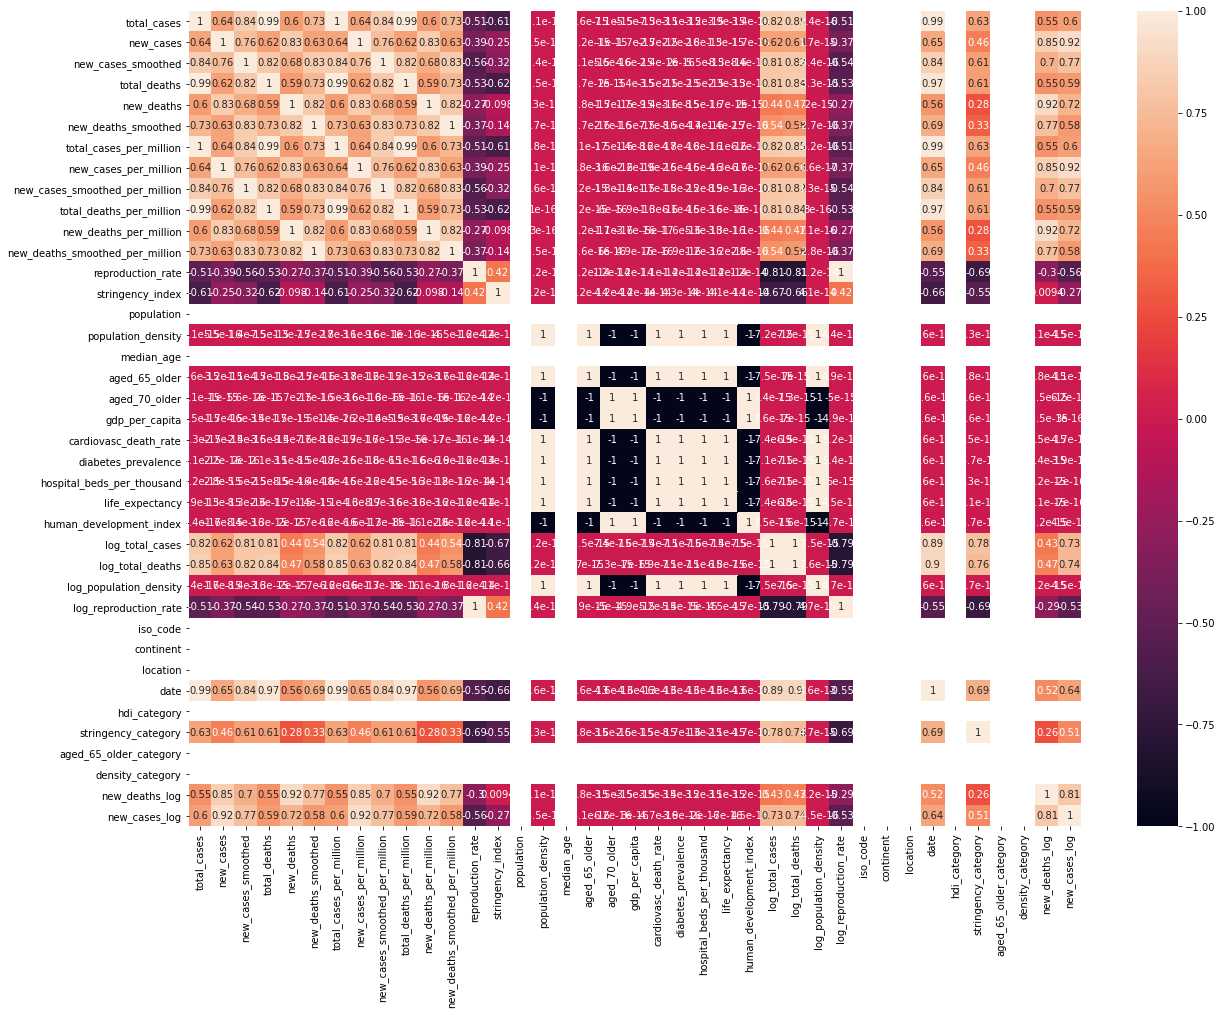

In [68]:
correlation_matrix = df.corr()
ax = pl.subplots(figsize=(20,15))
sb.heatmap(correlation_matrix, annot=True)
pl.show()

In [69]:
df_2 = df.drop(columns=['iso_code', 'continent', 'location', 'hdi_category', 'aged_65_older_category', 'density_category', 'population', 'median_age'])

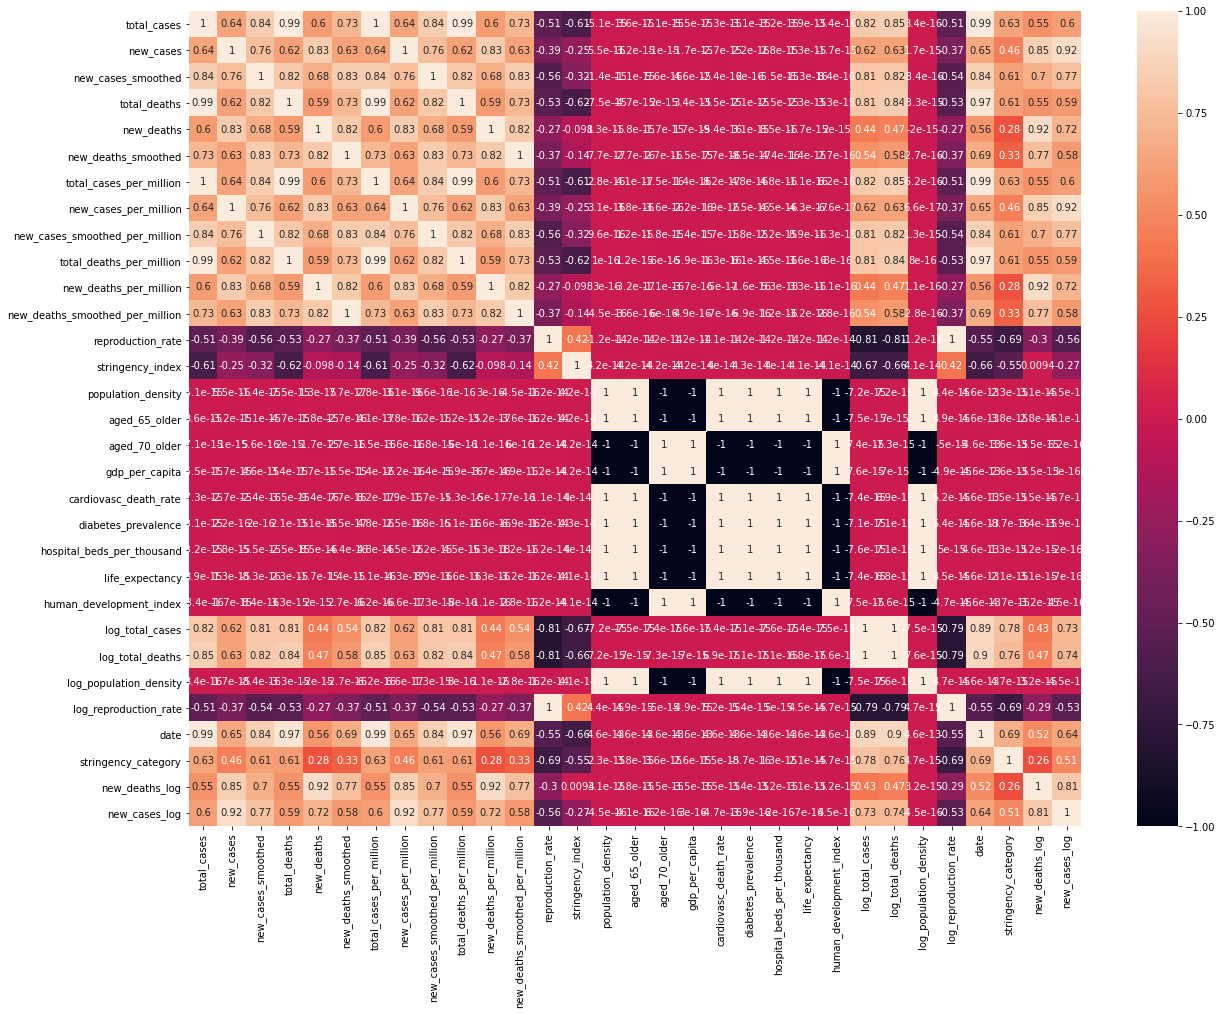

In [83]:
correlation_matrix = df_2.corr()
ax = pl.subplots(figsize=(20,15))
sb.heatmap(correlation_matrix, annot=True)
pl.show()

In [93]:
features = ['total_cases', 'new_cases', 'total_deaths', 'reproduction_rate', 'stringency_index', 'date']

In [94]:
X = np.array(df_2[features])

In [95]:
from sklearn.manifold import TSNE
data = TSNE().fit_transform(X)

In [97]:
tsne_df = pd.DataFrame(data, columns=['x', 'y'])

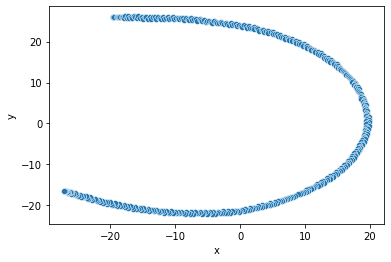

In [98]:
sb.scatterplot(data=tsne_df, x='x', y='y')
plt.show()